In [41]:
%pylab inline

import pandas as pd
import numpy as np

from lasagne.layers import InputLayer, DropoutLayer, DenseLayer
from lasagne.updates import adam
from lasagne.objectives import binary_crossentropy
from lasagne.nonlinearities import sigmoid
from nolearn.lasagne import NeuralNet

import theano
from theano import tensor as T
#from theano.tensor.nnet import sigmoid

from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, roc_auc_score

import datetime, time

Populating the interactive namespace from numpy and matplotlib


In [42]:
# Read data
wnv_train = pd.read_csv('../working/train_f.csv')
wnv_test = pd.read_csv('../working/test_f.csv')

In [43]:
# convert list of labels to binary class matrix
# convert list of labels to binary class matrix
labels = wnv_train.WnvPresent.values.astype('int')
#yr_train = np_utils.to_categorical(labels)
yr_train = labels.reshape(-1,1)
wnv_train.drop('WnvPresent', axis=1, inplace=True)
f_names = wnv_train.columns

In [44]:
# raw data
#yr_train = wnv_train[:,1].astype(int)
Xr_train =(wnv_train.values).astype('float64')
Xr_test = (wnv_test.values).astype('float64')

# normalize data
scaler = StandardScaler()
scaler.fit(Xr_train)
Xn_train = scaler.transform(Xr_train)
Xn_test = scaler.transform(Xr_test)

X_train, X_test, y_train, y_test = train_test_split(Xn_train, yr_train)

In [56]:
input_dim = len(X_train[0])
#nb_classes = y_train.shape[1]
hidden_dim = 512

#hidden_layers = 2
dropout = 0.4
#learning_rate = theano.shared(np.float32(0.1))

print input_dim

627


In [57]:
#class AdjustVariable(object):
#    def __init__(self, variable, target, half_life=20):
#        self.variable = variable
#        self.target = target
#        self.half_life = half_life
#    def __call__(self, nn, train_history):
#        delta = self.variable.get_value() - self.target
#        delta /= 2**(1.0/self.half_life)
#        self.variable.set_value(np.float32(self.target + delta))

In [60]:
# from https://www.kaggle.com/bitsofbits/predict-west-nile-virus/simple-lasagne-nn
net = None

# create model
net = NeuralNet(
    layers=[  
        ('input', InputLayer),
        ('hidden1', DenseLayer),
        ('dropout1', DropoutLayer),
        ('hidden2', DenseLayer),
        ('dropout2', DropoutLayer),
        ('hidden3', DenseLayer),
        ('dropout3', DropoutLayer),
        ('hidden4', DenseLayer),
        ('dropout4', DropoutLayer),
        ('hidden5', DenseLayer),
        ('dropout5', DropoutLayer),
        ('output', DenseLayer),
    ],
    # layer parameters:
    input_shape=(None, input_dim), 
    hidden1_num_units=hidden_dim, 
    dropout1_p=dropout,
    hidden2_num_units=hidden_dim, 
    dropout2_p=dropout,
    hidden3_num_units=hidden_dim, 
    dropout3_p=dropout,
    hidden4_num_units=hidden_dim, 
    dropout4_p=dropout,
    hidden5_num_units=hidden_dim, 
    dropout5_p=dropout,
    output_nonlinearity=sigmoid, 
    output_num_units=1, 

    # optimization method:
    update=adam,
    #update_learning_rate=learning_rate,
    #update_momentum=0.9,

    # Decay the learning rate
    on_epoch_finished=[
        #AdjustVariable(learning_rate, target=0, half_life=4),
    ],

    # This is silly, but we don't want a stratified K-Fold here
    # To compensate we need to pass in the y_tensor_type and the loss.
    regression=True,
    y_tensor_type = T.imatrix,
    objective_loss_function = binary_crossentropy,

    max_epochs=100, 
    eval_size=0.1,
    verbose=1,
    )

In [61]:
print("Training...")
net.fit(X_train, y_train)

Training...
# Neural Network with 1372673 learnable parameters

## Layer information

|   # | name     |   size |
|----:|:---------|-------:|
|   0 | input    |    627 |
|   1 | hidden1  |    512 |
|   2 | dropout1 |    512 |
|   3 | hidden2  |    512 |
|   4 | dropout2 |    512 |
|   5 | hidden3  |    512 |
|   6 | dropout3 |    512 |
|   7 | hidden4  |    512 |
|   8 | dropout4 |    512 |
|   9 | hidden5  |    512 |
|  10 | dropout5 |    512 |
|  11 | output   |      1 |

  epoch    train loss    valid loss    train/val  dur
-------  ------------  ------------  -----------  -----
      1       0.21841       0.22588      0.96694  5.51s
      2       0.18420       0.20120      0.91553  5.93s
      3       0.17586       0.18696      0.94062  5.85s
      4       0.17757       0.18130      0.97942  5.34s
      5       0.17252       0.17623      0.97892  5.43s
      6       0.17263       0.17592      0.98132  5.44s
      7       0.17188       0.17324      0.99214  5.37s
      8       0.169

NeuralNet(X_tensor_type=<function matrix at 0x0000000017493828>,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x0000000017E7DB38>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x0000000017E7DB00>,
     custom_score=None, dropout1_p=0.4, dropout2_p=0.4, dropout3_p=0.4,
     dropout4_p=0.4, dropout5_p=0.4, eval_size=0.1, hidden1_num_units=512,
     hidden2_num_units=512, hidden3_num_units=512, hidden4_num_units=512,
     hidden5_num_units=512, input_shape=(None, 627),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('hidden1', <class 'lasagne.layers.dense.DenseLayer'>), ('dropout1', <class 'lasagne.layers.noise.DropoutLayer'>), ('hidden2', <class 'lasagne.layers.dense.DenseLayer'>), ('dropout2', <class 'lasagne.layers.noise.DropoutLayer'>), ('hidden...<class 'lasagne.layers.noise.DropoutLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=None, max_epochs=100, more_params={},
     objective=<cl

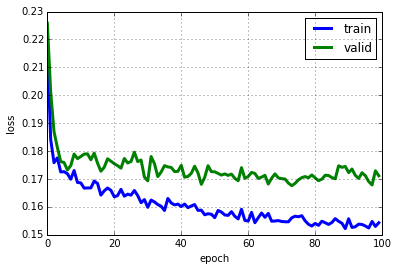

In [62]:
train_loss = np.array([i["train_loss"] for i in net.train_history_])
valid_loss = np.array([i["valid_loss"] for i in net.train_history_])
pyplot.plot(train_loss, linewidth=3, label="train")
pyplot.plot(valid_loss, linewidth=3, label="valid")
pyplot.grid()
pyplot.legend()
pyplot.xlabel("epoch")
pyplot.ylabel("loss")
#pyplot.ylim(1e-3, 1e-2)
#pyplot.yscale("log")
pyplot.show()

In [63]:
#preds = model.predict_classes(X_test, verbose=0)
#proba = model.predict_proba(X_test, verbose=0)
#preds = net.predict(X_test)
proba = net.predict_proba(X_test)
#print proba[:,0]
#print y_test

In [64]:
# accuracy
#matches = (preds == y_test[:,1])
#print matches.sum() / float(len(matches))

# f1 score
#print classification_report( y_test[:,1], preds)

# confusion matrix
#print confusion_matrix( y_test[:,1], preds)

# auc
print roc_auc_score(y_test[:,0], proba[:,0])

0.833369959981


Area under the ROC curve : 0.833370


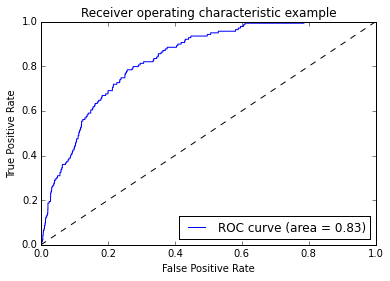

In [65]:
#np.max(proba[:,1])
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test[:,0], proba[:,0])
roc_auc = auc(fpr, tpr)
print "Area under the ROC curve : %f" % roc_auc

# Plot ROC curve
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [53]:
proba = net.predict_proba(Xn_test)

In [54]:
st = datetime.datetime.fromtimestamp(time.time()).strftime('%Y%m%d_%H%M%S')

def write_preds(proba, fname):
    pd.DataFrame({"Id": list(range(1,len(proba)+1)), "WnvPresent": proba}).to_csv(fname, index=False, header=True)

#write_preds(preds[range(28000)], "keras-mlp_" + st + ".csv")
write_preds(proba[:,0], "../working/lasange_test_" + st + ".csv")